# Bivariate analysis of house prices dataset
In the following notebook we're going to analyse what are the relations between specific variables explored in the univariate analysis

In [1]:
# import dataset and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline
pd.plotting.register_matplotlib_converters()
plt.rc('figure', figsize=(16, 6))


In [2]:
orig_data = pd.read_csv("data/train.csv", index_col="Id")

In [3]:
# copying the dataset for analysis
house_data = orig_data.copy()
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking missing values in each column
missing_val_count_by_column = house_data.isnull().sum()
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
Y = house_data["SalePrice"]
X = house_data.drop(['SalePrice'], axis=1)

categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", 
                        "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", 
                        "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", 
                        "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                        "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", 
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 'PoolQC', 'Fence', 
                        'MiscFeature', 'SaleType', 'SaleCondition']

numerical_features = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
                      "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", 
                      "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", 'Fireplaces', 
                      "GarageYrBlt", "GarageCars", "GarageArea", 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                      'ScreenPorch', 'PoolArea', "MiscVal", 'MoSold', 'YrSold']

## Cases to check
There are number of possibly interesting interactions between features that we theorized in the univariate analysis:
- interaction between month and year and the number of sold houses
- interaction between type of furnace (Heating) and the year of construction / remodel date
- interaction between year of construction and the type of garage
- interaction between year of construction and type of roof
- spatial analysis of type of roof
- investigate grouping of year of construction
- check if "GarageYrBlt" has a strong correlation with the "YearBuilt"
- interaction between year of construction and the area of garage
- number of rooms, bathrooms and the built year.

### ...

## Interaction between month and year and the number of sold houses
What we want to check is interaction between two categorical variables. The best ways to do that are two-way tables, heatmaps, kdeplots and swarmplots.

In [6]:
month_year_table = pd.crosstab(index=X["MoSold"], columns=X["YrSold"])
pd.crosstab(index=X["MoSold"], columns=X["YrSold"], margins=True, normalize=True)

YrSold,2006,2007,2008,2009,2010,All
MoSold,,,,,,
1,0.006849,0.008904,0.008904,0.008219,0.006849,0.039726
2,0.006164,0.005479,0.006849,0.006849,0.010274,0.035616
3,0.017123,0.015753,0.012329,0.013014,0.014384,0.072603
4,0.018493,0.015753,0.017808,0.017808,0.026712,0.096575
5,0.026027,0.029452,0.026027,0.025342,0.032877,0.139726
6,0.032877,0.040411,0.034932,0.040411,0.024658,0.173288
7,0.045890,0.034932,0.033562,0.041781,0.004110,0.160274
8,0.015753,0.027397,0.019863,0.020548,0.000000,0.083562
9,0.010274,0.007534,0.011644,0.013699,0.000000,0.043151


From the "All" columns it can be clearly seen that most of the sales happened during May, June and July. Year by year sales are pretty stable with 2010 having lower sales because gathered data stops at the summer of that year.

Most sales happened during July of 2006 and 2009. 

Year 2010 has a very strange distribution of sales with May having more sales than June, when for other year the inverse was true.

<AxesSubplot:xlabel='YrSold', ylabel='MoSold'>

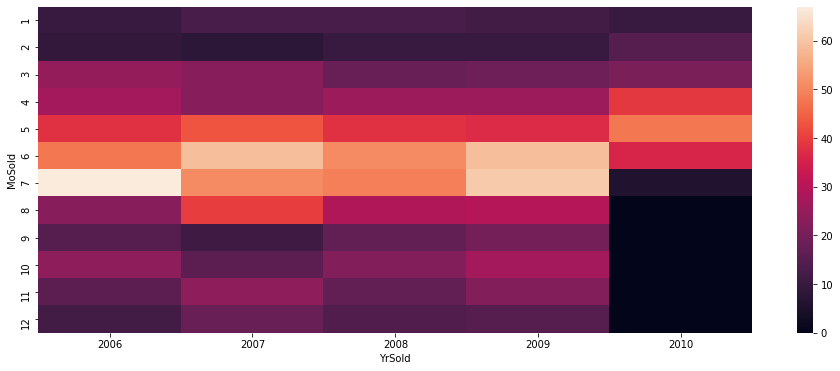

In [22]:
sns.heatmap(month_year_table)

The heatmap is a useful way to see relation between magnitudes. Here we can easily confirm statements derived from two-way table.

We can also see that in 2007 there was a particularly long season of houses acquisitions

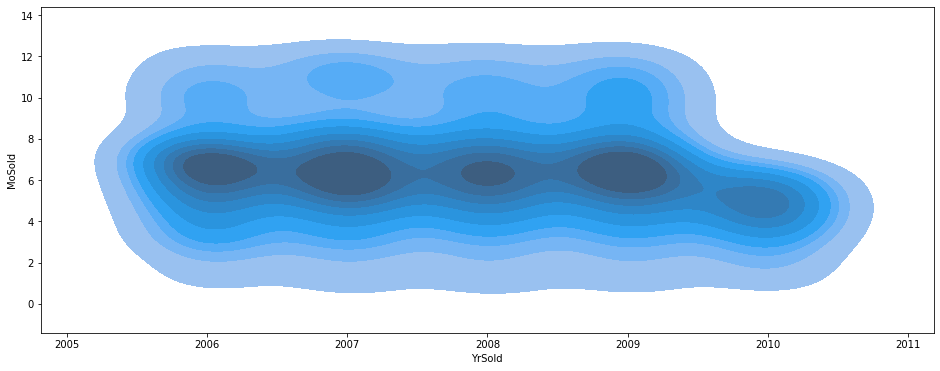

In [19]:
sns.kdeplot(y=X["MoSold"], x=X["YrSold"], shade=True)
plt.show()

Kde plot is usually incorporated or utilized when working with continuous variables. But it can also be used with categorical knowing its limitations.

A clear trend of sales in the summer is once again seen with high sales early in 2010. 

It's more difficult to pinpoint exact magnitude of sales in each month as it seems that July of 2006 had less sales than July of 2007 which isn't true. What is true however is that season was longer in 2007 which is clearly shown.

<AxesSubplot:xlabel='YrSold', ylabel='MoSold'>

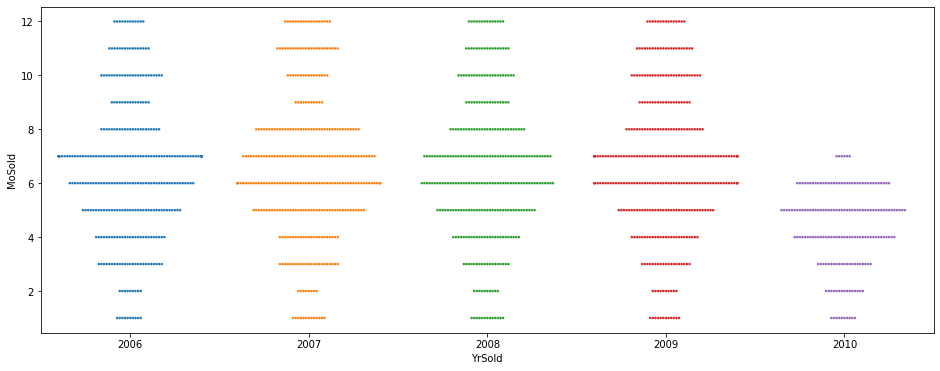

In [27]:
sns.swarmplot(y=X["MoSold"], x=X["YrSold"], size=2.5)

Swarm plot is useful in comparing distribution among the years. E.g. in 2006 the amount of houses sold steadily grew from April to July and then drasticly lowered in August. Whereas in 2007 the summer season has more of a Gaussian shape with peak in June.

Overall it seems that there are two distinct periods:
- Spring-Summer with a large peak near June/July
- Fall-Winter with a smaller peak near October/November

## Interaction between type of furnace (Heating) and the year of construction / remodel date
We want to check an interaction between a categorical variable and a numerical one (or a categorical with high cardinality). For this purpose we can use swarmplots, kdeplots, scatterplots with color-coding, boxplots or even pointplots.

Because "Heating" is dominated by only one type, I'm going to use just swarm plots and histograms.

<AxesSubplot:xlabel='Heating', ylabel='YearBuilt'>

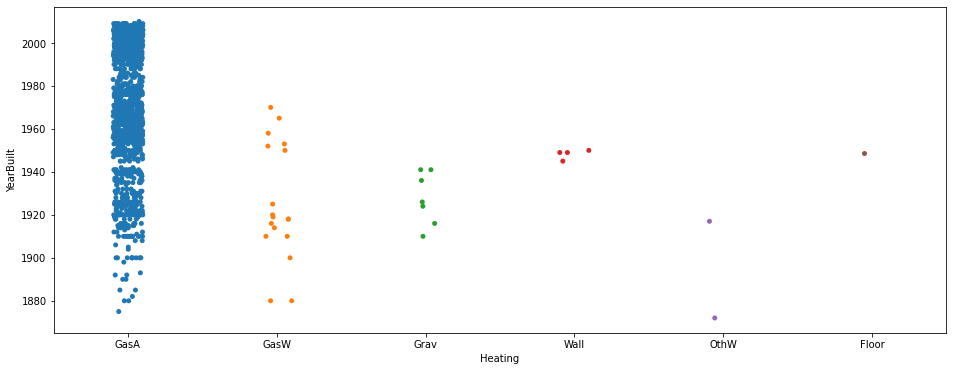

In [30]:
sns.stripplot(y=X["YearBuilt"], x=X["Heating"])

Strip plot is a variation of swarm plot that has limited width for the points. Frankly I'm quite surprised by this plot as I expected the gravity furnaces to be used more at the end of XIX century which is not seen. There is a very limited number of types different than the "GasA" which was seen on the univariate analysis of this feature.

- "GasA" appears to be common at all times, we will investigate further below
- "GasW" seems to be only common when a lot of houses were built (graph of distribution of YearBuilt is for context included below
- "Grav" were only built from 1910s to 1940s in very limited number
- "Wall" only popular from 1940 to 1950
- "OthW" and "Floor" - very rare types, not seen in contemporary times

Let's look at swarm plot of "GasA" type and count of year built for context.

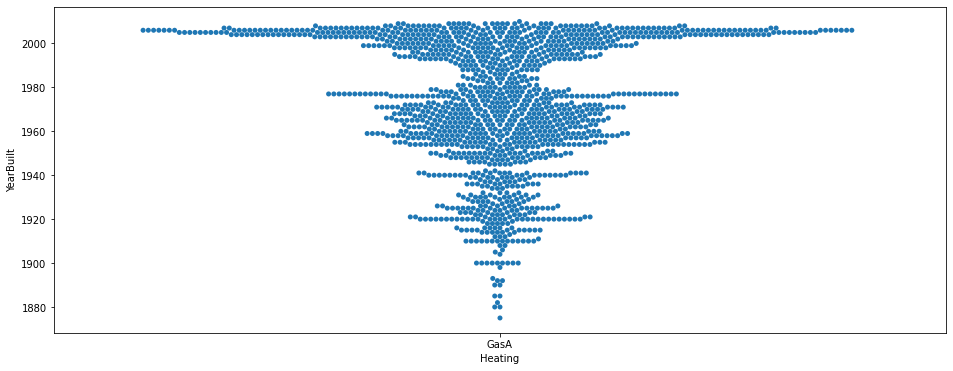

In [34]:
sns.swarmplot(y=X["YearBuilt"], x=X["Heating"][X["Heating"] == "GasA"])
plt.show()

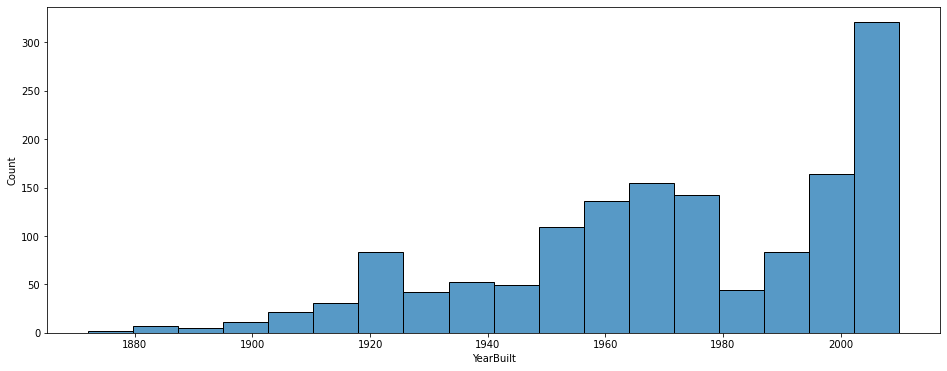

In [35]:
sns.histplot(data=X["YearBuilt"])
plt.show()

It is clear that since most building have "GasA" type that frequency graph of it will closely follow histogram of "YearBuilt"

Let's look at relation between Heating and remodel date:

<AxesSubplot:xlabel='Heating', ylabel='YearRemodAdd'>

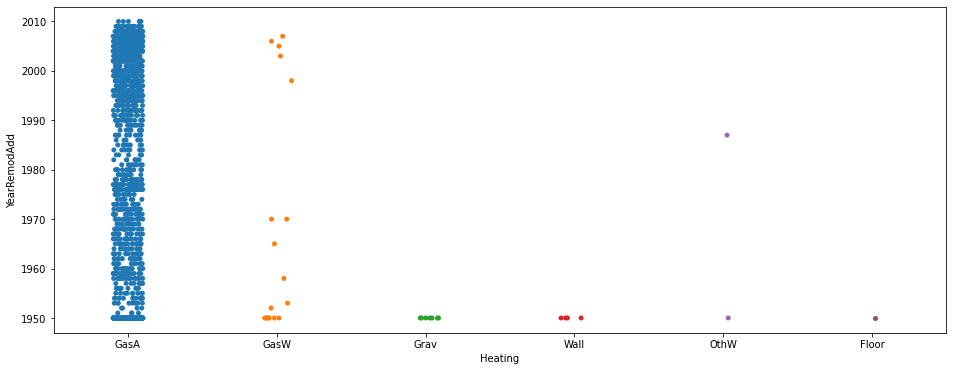

In [37]:
sns.stripplot(y=X["YearRemodAdd"], x=X["Heating"])

Because of how this variable was created we see an accumulation of older buildings into the 1950s starting date. Sadly in this manner it's not possible to distinguish if these buildings were remodeled in 1950s or they were accumulated into that date. During the model building phase it might be beneficial to create a "Was remodeled" binary variable which would digest this information.

<AxesSubplot:xlabel='Heating', ylabel='YearRemodAdd'>

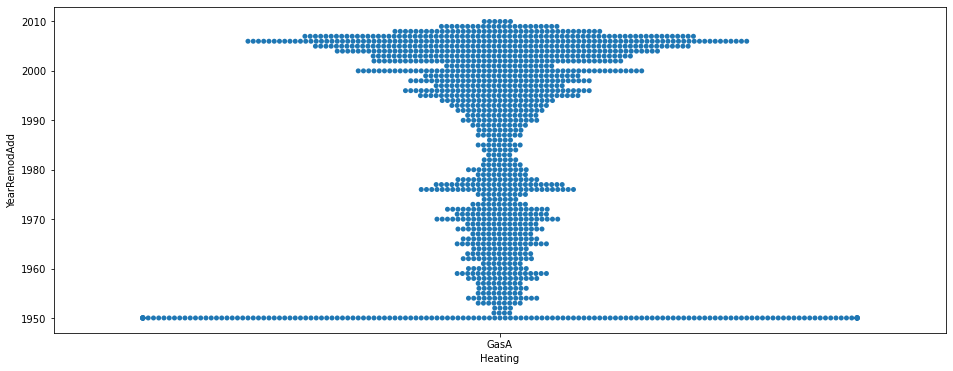

In [39]:
sns.swarmplot(y=X["YearRemodAdd"], x=X["Heating"][X["Heating"] == "GasA"])

Now it is very clear that older buildings were just accumulated into the single date of 1950s.

## Interaction between construction date and garage characteristics
Garage variable has some missing values which correspond to lack of garage. In visualising I will replace these with category "NoGarage"

First let's look at the interaction between year and type of Garage:

c:\users\lenovo\appdata\local\programs\python\python38_jupyter\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


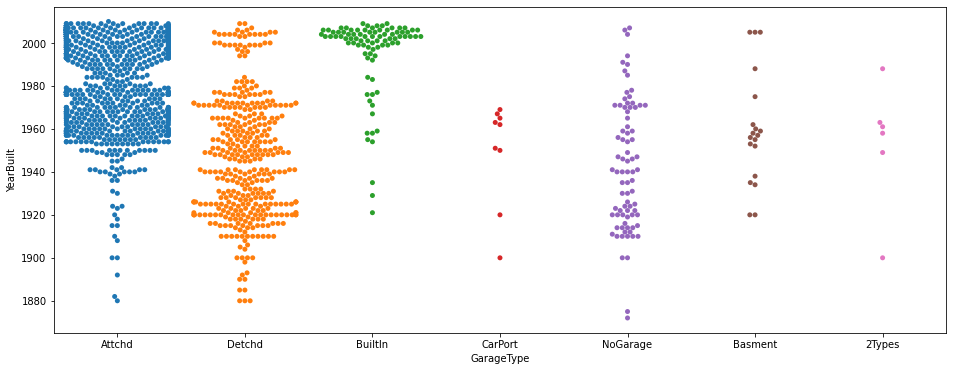

In [55]:
sns.swarmplot(y=X["YearBuilt"], x=X["GarageType"].fillna("NoGarage"))
plt.show()

A very interesting graph showing variety of types throughout the years. I will analyse "Attchd" and "Detchd" below because of their numerosity.

Starting from the right:
- "2Types": most houses have only one type of a garage, nothing out of ordinary
- "Basment": rare type, only occuring after 1920s, most cropping up in 1960s
- "NoGarage": After 1920s the number of houses sold per year without a garage stays fairly constant. As number of houses sold were increasing this means that less and less people didn't have a garage. It is intuitive as having a garage is a norm nowadays.
- "CarPort": Very few people have car ports. They don't occur after 1970s
- "BuiltIn": It seems to be a recent trend as increase in sales numbers does not justify such huge increase. It is still fairly rare compared to homes with "Attchd" type as number of such houses built after 2000 is equal:

In [47]:
X["GarageType"][X["GarageType"] == "BuiltIn"][X["YearBuilt"] >= 2000].count()

60

And the number of "Attchd" type in the same period:

In [48]:
X["GarageType"][X["GarageType"] == "Attchd"][X["YearBuilt"] >= 2000].count()

299

Also number of all houses sold after 2000 for context:

In [49]:
X["GarageType"][X["YearBuilt"] >= 2000].count()

385

So about 1/6 of all houses sold after 2000 has a built-in garage type.

Plot of just Attached and Detached types:

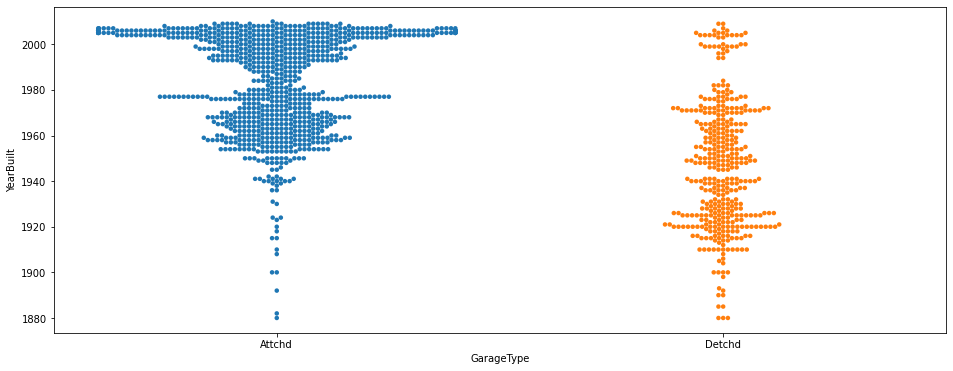

In [56]:
sns.swarmplot(y=X["YearBuilt"], x=X["GarageType"][X["GarageType"].isin(["Attchd", "Detchd"])], size=4.5)
plt.show()

- "Detchd": Most such houses were built from 1920s to 1980s, with very few houses being built nowadays. There is also a significant dip near 1985 which follows from overall distribution of sold houses.
- "Attchd": From 1950s most houses built and sold had an attached garage, therefore distribution follows heavily the overall pattern of the sold houses vs built year graph.

Thinking about the distribution of sold houses, the number of built houses in a year might have a strong correlation with a population pyramid at that time. (TODO - possibly check that in the future)

We can further look at the interaction between garage type and and the built year by investigating how area of the garage changed with years.

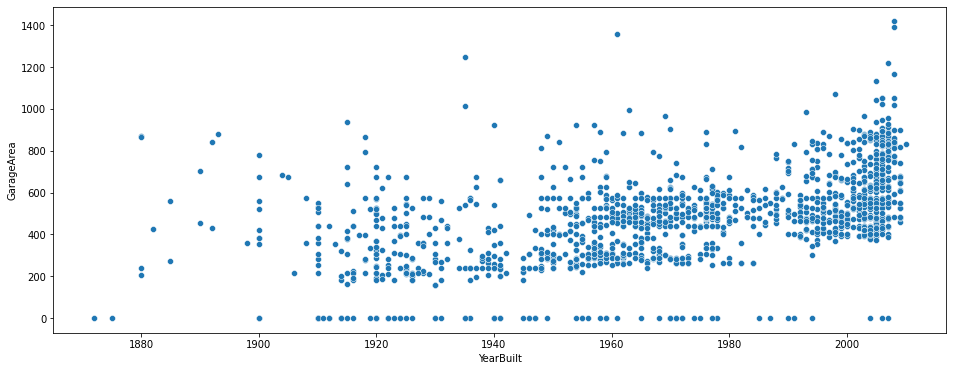

In [58]:
sns.scatterplot(x=X["YearBuilt"], y=X["GarageArea"])
plt.show()

We see that minimal area definitely increased with the years which might indicate that space for many cars is needed and/or size of cars increased throughout the years. We can also fit linear regression into this relation:

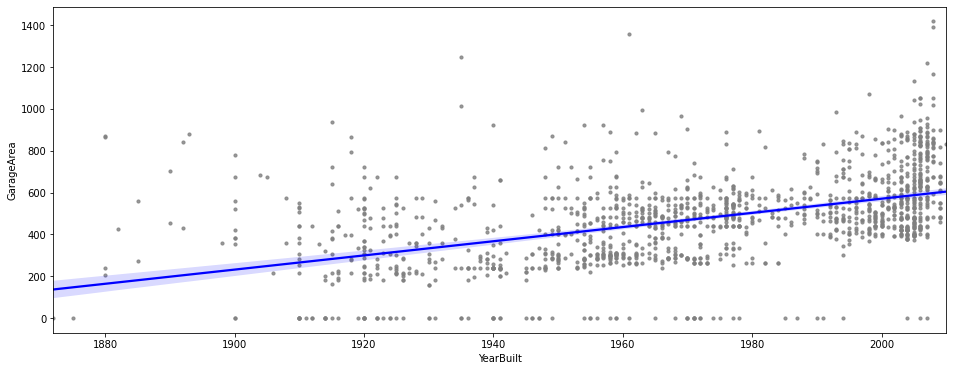

In [69]:
sns.regplot(x=X["YearBuilt"], y=X["GarageArea"], scatter_kws={"color":"gray", "s":10}, line_kws={"color":"blue"})
plt.show()

Which confirms the increasing trend of garage areas. We can check how area translates to amount of cars that can fit into the garage by plotting the size of garage in terms of car capacity throughout the years.

c:\users\lenovo\appdata\local\programs\python\python38_jupyter\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python38_jupyter\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='YearBuilt'>

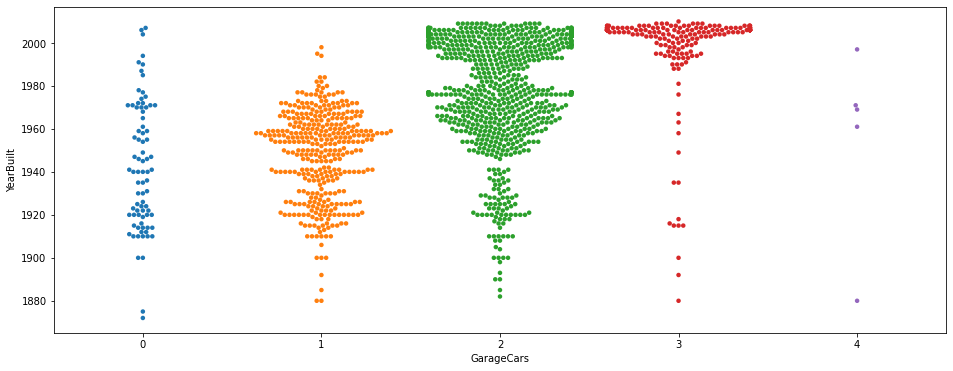

In [71]:
sns.swarmplot(y=X["YearBuilt"], x=X["GarageCars"].fillna(0), size=4.5)

We can see that a very elite minority has space for 4 cars in their garage. Relatively few don't have a garage at all. For the rest there is a clear pattern for an increased demand for more space for cars through the years. (Houses were built to be able to hold more cars in the garage)

- From 1920 to 1970s majority of houses had space for 1 or 2 cars in their garage.
- From 1970s to 2000s majority had space for 2 cars
- From 2000 onwards there is clear increase in houses with capacity for 3 cars. The amount of houses which had space for 3 cars and were built after 2000 is as follows:

In [73]:
X["GarageCars"][X["GarageCars"] == 3][X["YearBuilt"] >= 2000].count()

134

And all houses which were built after 2000:

In [77]:
X["GarageCars"][X["YearBuilt"] >= 2000].count()

388

So over a third (!) of houses built nowadays has space for 3 cars.

At last we will check if "GarageYrBlt" has a strong correlation with the "YearBuilt":

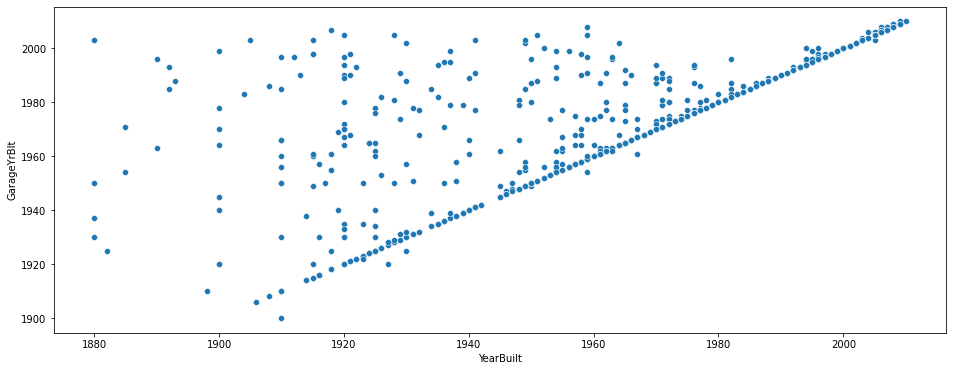

In [81]:
sns.scatterplot(y=X["GarageYrBlt"], x=X["YearBuilt"])
plt.show()

In [80]:
np.sum(X["GarageYrBlt"] == X["YearBuilt"])

1089

From the graph we can see that most of garages were built at the same time as the house (1089 out of 1379 = 79% of houses had garage built in the same year). This is especially true for houses built after 1985. 

For other years it happened that, on a particular parcel, garage was built first and then the house, e.g one case around 1960 and another around 1970.

For many buildings before 1980 garage was built in a different year than the house. We can obtain a precise number by doing the following:

In [82]:
np.sum(X["GarageYrBlt"][X["YearBuilt"] < 1980] != X["YearBuilt"][X["YearBuilt"] < 1980])

311

This can be compared with number of houses built before 1980:

In [84]:
X["YearBuilt"][X["YearBuilt"] < 1980].count()

848

So in around 36% (311/848) of parcels, garage was added after the house.

We can also calculate the correlation coefficient between "GarageYrBlt" and "YearBuilt":

In [99]:
corr, _ = pearsonr(X["GarageYrBlt"][X["GarageYrBlt"].notnull()], X["YearBuilt"][X["GarageYrBlt"].notnull()])
corr

0.825667484174342

They seem to be highly correlated.

## Interaction between year of construction and type of roof
It is an interaction between categorical and discrete numerical variable. Swarmplot might be very useful in its analysis:

c:\users\lenovo\appdata\local\programs\python\python38_jupyter\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


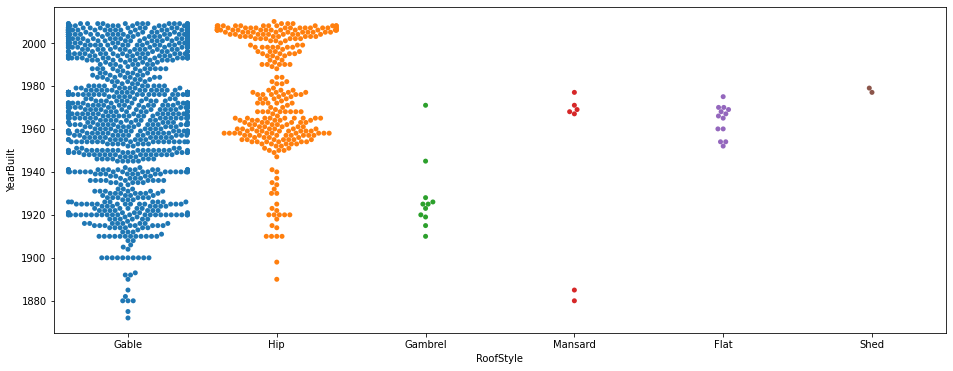

In [8]:
sns.swarmplot(y=X["YearBuilt"], x=X["RoofStyle"])
plt.show()

Only two types of roof are commonly found "Hip" and "Gable". "Hip" wasn't a very common type up until 1960s where it started to oscillate together with number of build houses (expected distribution). Distribution of Gable isn't clear so I will plot it again below:

<AxesSubplot:xlabel='RoofStyle', ylabel='YearBuilt'>

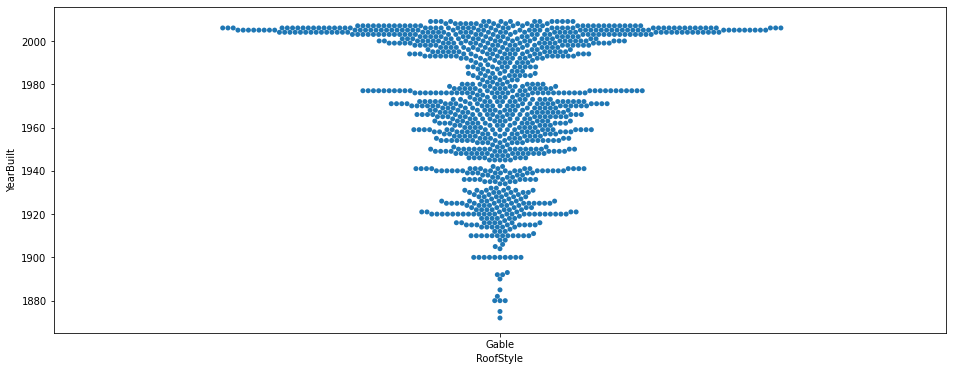

In [9]:
sns.swarmplot(y=X["YearBuilt"], x=X["RoofStyle"][X["RoofStyle"] == "Gable"])

As expected it also oscillates with the years. It has also been dominant over the whole century, at any time more houses were built with this type of roof than any other.

## Time dependence of number of rooms

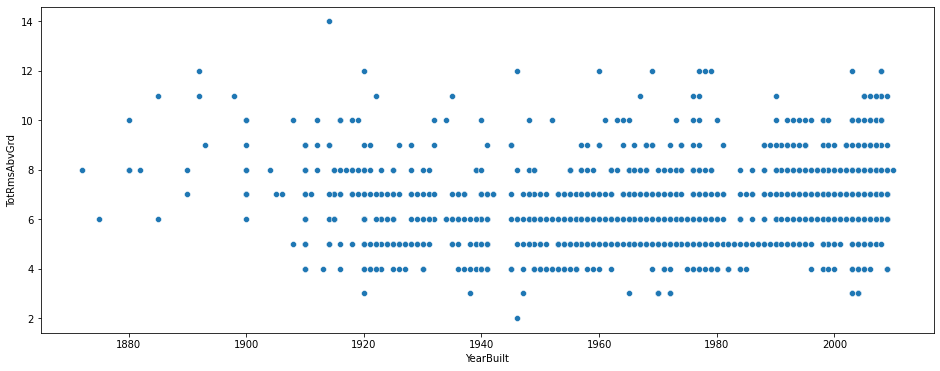

In [12]:
sns.scatterplot(y=X["TotRmsAbvGrd"], x=X["YearBuilt"])
plt.show()

Interestingly, there seems to be no correlation with the year. The number of rooms does not inrease nor decrease. We can calculate Pearson' correlation:

In [13]:
corr, _ = pearsonr(X["TotRmsAbvGrd"], X["YearBuilt"])
corr

0.09558912829795227

As expected, it's near 0. We can also check how number of bedrooms and bathrooms changed:

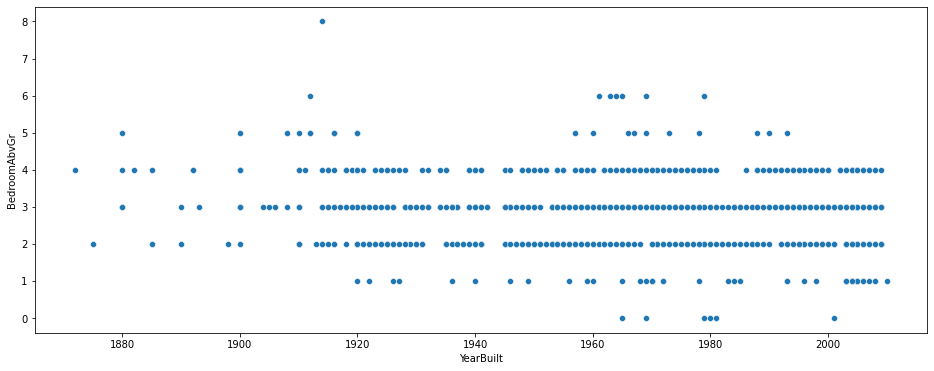

In [15]:
sns.scatterplot(y=X["BedroomAbvGr"], x=X["YearBuilt"])
plt.show()

In [16]:
corr, _ = pearsonr(X["BedroomAbvGr"], X["YearBuilt"])
corr

-0.07065121690473036

<AxesSubplot:xlabel='YearBuilt', ylabel='FullBath'>

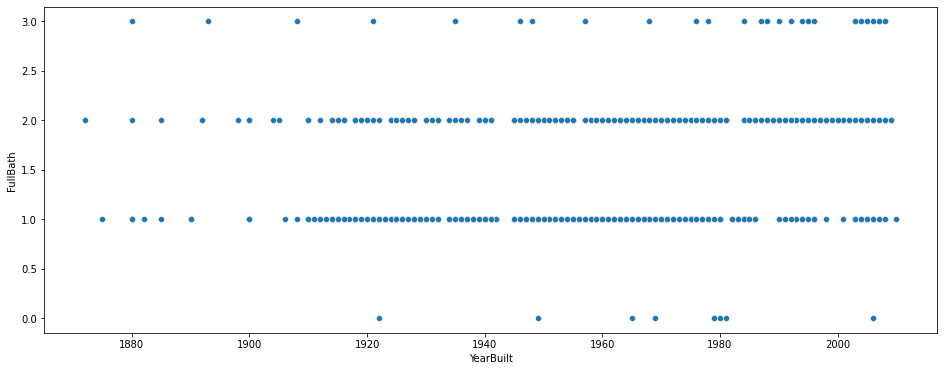

In [18]:
sns.scatterplot(y=X["FullBath"], x=X["YearBuilt"])

In [19]:
corr, _ = pearsonr(X["FullBath"], X["YearBuilt"])
corr

0.46827078717267157

Only this case we have a slight positive correlation, but it's not very high.